In [36]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense, Dropout
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [1]:
! kaggle datasets download -d ashfakyeafi/cat-dog-images-for-classification

Dataset URL: https://www.kaggle.com/datasets/ashfakyeafi/cat-dog-images-for-classification
License(s): CC0-1.0
 98% 532M/545M [00:07<00:00, 98.5MB/s]
100% 545M/545M [00:07<00:00, 76.4MB/s]


In [6]:
import zipfile

with zipfile.ZipFile('/content/cat-dog-images-for-classification.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')
    zip_contents = zip_ref.namelist()
    # print(zip_contents)

In [7]:
import os
extracted_path = '/content/cat_dog'
files = os.listdir(extracted_path)
# print(files)

In [11]:
df = pd.read_csv('/content/cat_dog.csv')
df.head()

image  labels
0  dog.11289.jpg       1
1  cat.10836.jpg       0
2   cat.7970.jpg       0
3   cat.2212.jpg       0
4   dog.2653.jpg       1

In [12]:
df["labels"] = df["labels"].replace({0: 'cat', 1: 'dog'})

In [15]:
train_df, valid_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

In [16]:
train_df['labels'].value_counts()

labels
dog    10008
cat     9992
Name: count, dtype: int64

In [17]:
valid_df['labels'].value_counts()

labels
cat    2508
dog    2492
Name: count, dtype: int64

In [18]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_CHANNELS=3
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)

In [19]:
total_train = train_df.shape[0]
total_validate = valid_df.shape[0]
batch_size=15

In [20]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "/content/cat_dog",
    x_col='image',
    y_col='labels',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [21]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_dataframe(
    valid_df,
    "/content/cat_dog",
    x_col='image',
    y_col='labels',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [22]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
#     BatchNormalization(),
    MaxPool2D(pool_size=(4,4)),
    Dropout(rate=0.25),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(4,4)),
    Dropout(rate=0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(4,4)),
    Dropout(rate=0.25),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(rate=0.5),
    Dense(2, activation='softmax')

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 5, 5, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 5, 5, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161,090 (629.26 KB)

 Trainable params: 160,706 (627.76 KB)

 Non-trainable params: 384 (1.50 KB)

In [28]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import  ReduceLROnPlateau
import random
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [29]:
# MobileNetV2-based Transfer Learning


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS))
base_model.trainable = False  # Freeze base layers initially

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

In [30]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator,
    callbacks=[early_stopping, lr_scheduler]
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1334/1334 ━━━━━━━━━━━━━━━━━━━━ 500s 369ms/step - accuracy: 0.9152 - loss: 0.2074 - val_accuracy: 0.9612 - val_loss: 0.0976 - learning_rate: 1.0000e-04
Epoch 2/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 475s 355ms/step - accuracy: 0.9494 - loss: 0.1307 - val_accuracy: 0.9562 - val_loss: 0.1142 - learning_rate: 1.0000e-04
Epoch 3/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 469s 351ms/step - accuracy: 0.9546 - loss: 0.1117 - val_accuracy: 0.9662 - val_loss: 0.0889 - learning_rate: 1.0000e-04
Epoch 4/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 491s 342ms/step - accuracy: 0.9575 - loss: 0.1073 - val_accuracy: 0.9640 - val_loss: 0.0937 - learning_rate: 1.0000e-04
Epoch 5/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.9624 - loss: 0.0928
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 511s 350ms/step - accuracy: 0.9624 - loss: 0.0928 - val_accuracy: 0.9650 - val_loss: 0.0896 - learning_rate: 1.0000e-04
Epoch 6/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 482s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction for /content/cat_dog/cat.8572.jpg: Cat


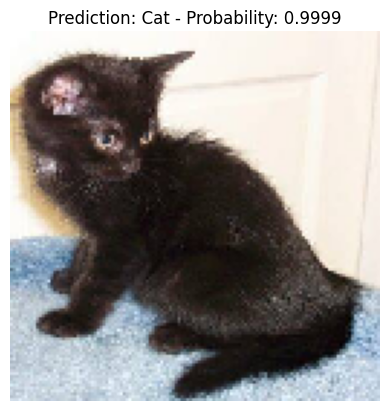

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prediction for /content/cat_dog/dog.3548.jpg: Dog


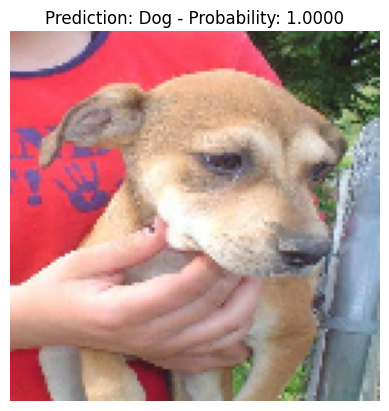

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Prediction for /content/cat_dog/dog.9192.jpg: Dog


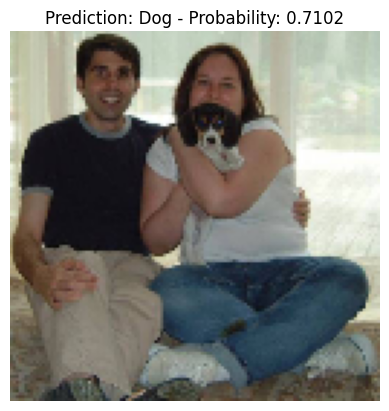

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Prediction for /content/cat_dog/cat.2643.jpg: Cat


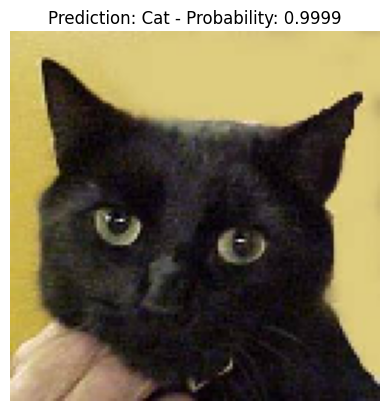

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction for /content/cat_dog/dog.11594.jpg: Dog


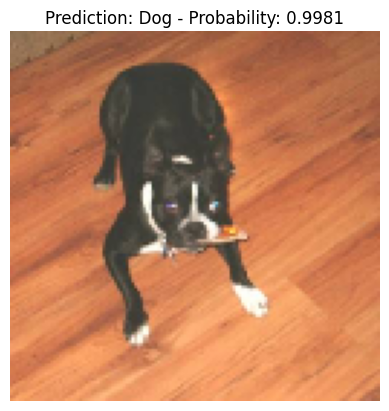

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction for /content/cat_dog/cat.6363.jpg: Cat


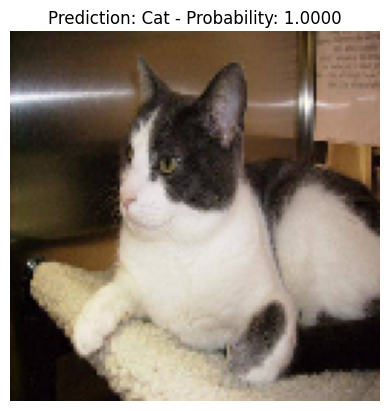

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction for /content/cat_dog/cat.10769.jpg: Cat


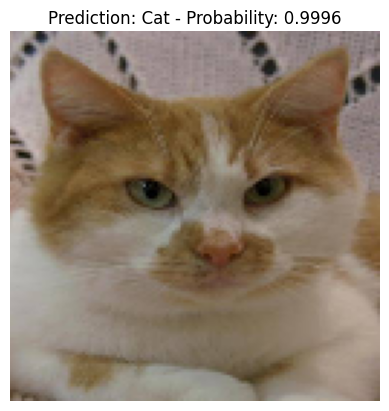

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Prediction for /content/cat_dog/cat.2003.jpg: Cat


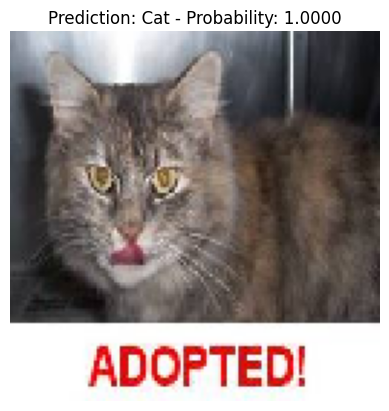

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Prediction for /content/cat_dog/cat.9006.jpg: Dog


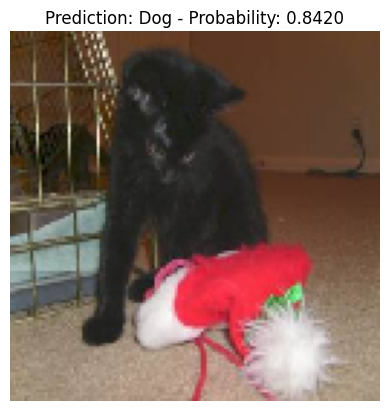

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction for /content/cat_dog/dog.899.jpg: Dog


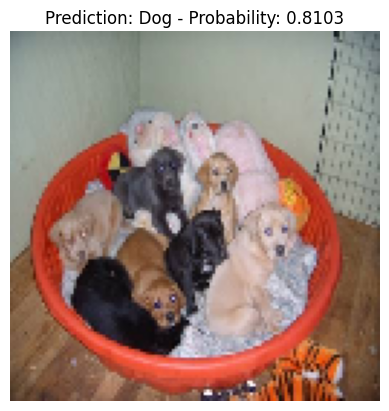

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction for /content/cat_dog/dog.1855.jpg: Dog


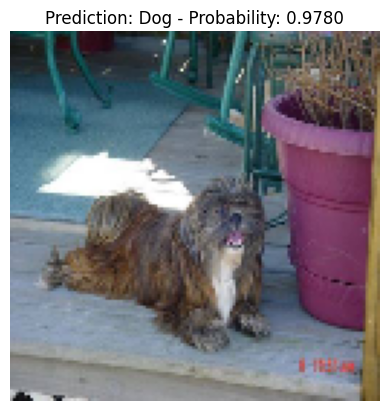

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Prediction for /content/cat_dog/dog.10878.jpg: Dog


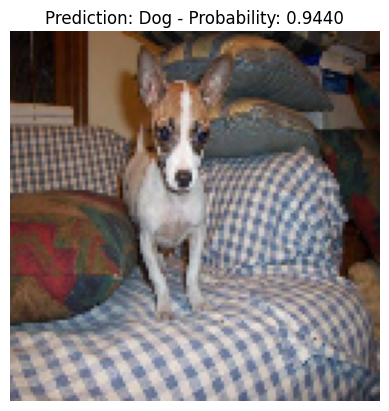

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Prediction for /content/cat_dog/cat.10973.jpg: Cat


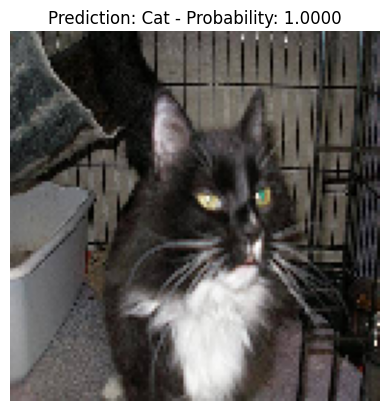

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Prediction for /content/cat_dog/cat.5287.jpg: Cat


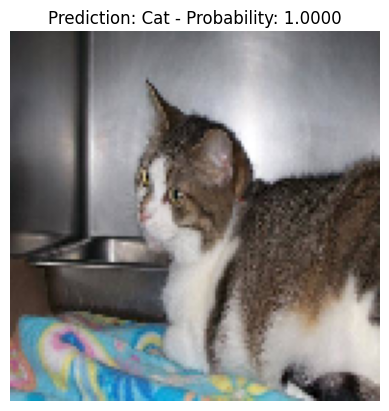

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Prediction for /content/cat_dog/cat.9464.jpg: Cat


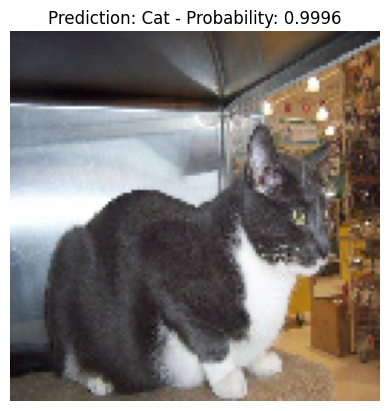

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Prediction for /content/cat_dog/cat.7049.jpg: Cat


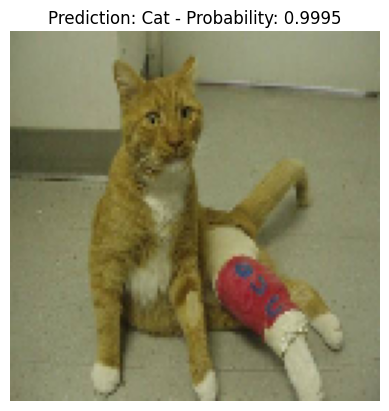

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Prediction for /content/cat_dog/cat.4327.jpg: Cat


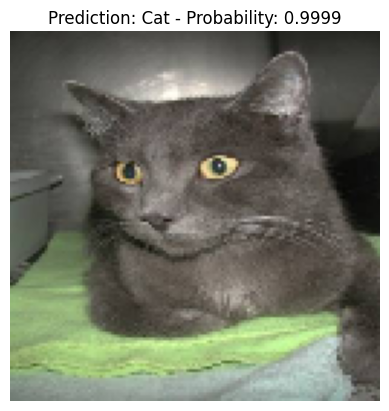

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Prediction for /content/cat_dog/dog.8246.jpg: Dog


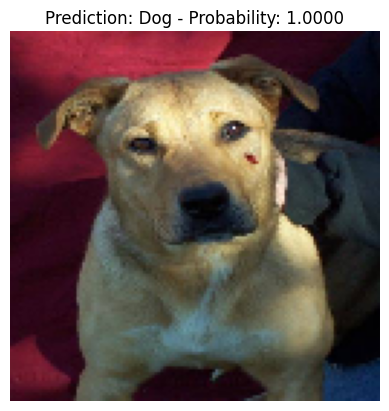

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Prediction for /content/cat_dog/cat.10246.jpg: Cat


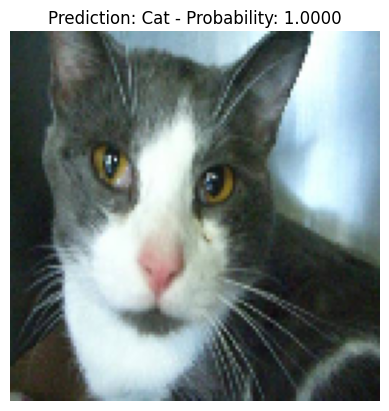

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Prediction for /content/cat_dog/dog.787.jpg: Dog


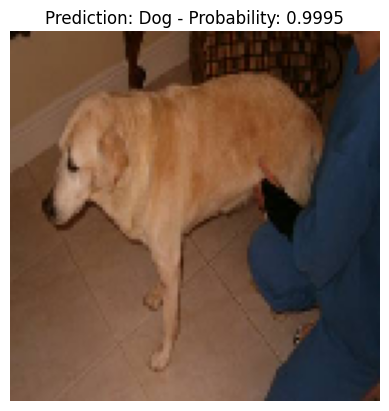

In [35]:
def predict_image(img_path):

    img = image.load_img(img_path, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)  # Use MobileNetV2 preprocessing


    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)


    if predicted_class == 0:
        print(f"Prediction for {img_path}: Cat")
    else:
        print(f"Prediction for {img_path}: Dog")

    # Plot the image
    plt.imshow(img)
    plt.title(f"Prediction: {'Cat' if predicted_class == 0 else 'Dog'} - Probability: {prediction[0][predicted_class]:.4f}")
    plt.axis('off')
    plt.show()
    return f"Prediction for {img_path}: {'Cat' if predicted_class == 0 else 'Dog'} - Probability: {prediction[0][predicted_class]:.4f}"



# Prediction on 20 images
image_dir = '/content/cat_dog'
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]
num_images_to_predict = min(20, len(image_files))
selected_images = random.sample(image_files, num_images_to_predict)

for image_file in selected_images:
    image_path = os.path.join(image_dir, image_file)
    predict_image(image_path)
